## Predicting Healthcare Insurance Costs


### Importing necessary Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Read Insurance DataFrame

In [2]:
insurance = pd.read_csv('insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.924
1,18.0,male,33.770,1.0,no,Southeast,1725.5523
2,28.0,male,33.000,3.0,no,southeast,$4449.462
3,33.0,male,22.705,0.0,no,northwest,$21984.47061
4,32.0,male,28.880,0.0,no,northwest,$3866.8552


## Data Cleaning

#### Check NAN Data

In [3]:
nan_df = insurance[insurance.isna().any(axis = 1)]
nan_df

,age,sex,bmi,children,smoker,region,charges
23,-34.0,female,NaN,1.0,yes,NaN,$37701.8768
32,NaN,NaN,28.600,NaN,NaN,Southwest,$nan
43,37.0,female,NaN,NaN,NaN,southeast,6313.759
44,NaN,male,NaN,NaN,no,NaN,NaN
49,NaN,NaN,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1296,NaN,NaN,26.125,0.0,NaN,northeast,1708.92575
1309,NaN,male,NaN,NaN,no,Southwest,NaN
1312,NaN,M,NaN,1.0,NaN,Southwest,4536.259
1314,30.0,NaN,23.655,NaN,yes,northwest,NaN


#### Drop rows of NAN Data

In [4]:
insurance = insurance.dropna(how = 'any')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.924
1,18.0,male,33.770,1.0,no,Southeast,1725.5523
2,28.0,male,33.000,3.0,no,southeast,$4449.462
3,33.0,male,22.705,0.0,no,northwest,$21984.47061
4,32.0,male,28.880,0.0,no,northwest,$3866.8552


#### Updating Sex column values to be Male and Female

In [5]:
insurance['sex'].unique()

array(['female', 'male', 'woman', 'F', 'man', 'M'], dtype=object)

In [6]:
insurance['sex'] = insurance['sex'].replace({
    'male': 'Male',
    'man': 'Male',
    'M': 'Male',
    'female': 'Female',
    'woman': 'Female',
    'F': 'Female'
})
insurance['sex'].unique()
    

array(['Female', 'Male'], dtype=object)

#### Standardize charges column data type (float64) and remove "$" sign 

In [26]:
insurance['charges'].info()

<class 'pandas.core.series.Series'>
Index: 1208 entries, 0 to 1337
Series name: charges
Non-Null Count  Dtype 
--------------  ----- 
1208 non-null   object
dtypes: object(1)
memory usage: 18.9+ KB


In [34]:
insurance['charges'] = insurance['charges'].str.strip('$').astype('float64')
insurance['charges'].info()

<class 'pandas.core.series.Series'>
Index: 1208 entries, 0 to 1337
Series name: charges
Non-Null Count  Dtype  
--------------  -----  
1207 non-null   float64
dtypes: float64(1)
memory usage: 18.9 KB


#### change the data type of the smoker column to boolean also Convert 'yes' to True and 'no' to False

In [67]:
insurance['smoker'] = insurance['smoker'].map({'yes': True, 'no': False})
insurance['smoker'].head()

0     True
1    False
2    False
3    False
4    False
Name: smoker, dtype: bool

In [70]:
insurance['smoker'] = insurance['smoker'].astype(bool)
insurance['smoker'].dtype

dtype('bool')

#### To convert the values in the bmi, children, charges, and age columns to their absolute values

In [75]:
columns_to_convert = ['bmi', 'children', 'charges', 'age']
insurance[columns_to_convert] = insurance[columns_to_convert].abs()
insurance.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19.0,Female,27.900,0.0,True,southwest,16884.92400
1,18.0,Male,33.770,1.0,False,Southeast,1725.55230
2,28.0,Male,33.000,3.0,False,southeast,4449.46200
3,33.0,Male,22.705,0.0,False,northwest,21984.47061
4,32.0,Male,28.880,0.0,False,northwest,3866.85520
5,31.0,Female,25.740,0.0,False,southeast,3756.62160
6,46.0,Female,33.440,1.0,False,southeast,8240.58960
7,37.0,Female,27.740,3.0,False,Northwest,7281.50560
8,37.0,Male,29.830,2.0,False,Northeast,6406.41070
9,60.0,Female,25.840,0.0,False,northwest,28923.13692


## Data Exploration!

### Question 1 : Create scatterplots of our variables mapped to charges with smoker

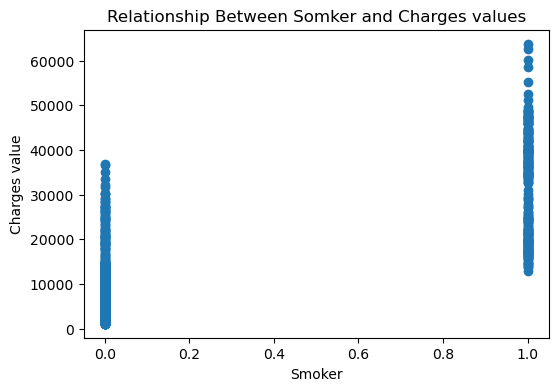

In [86]:
plt.figure(figsize=(6,4))
plt.title('Relationship Between Somker and Charges values')
plt.xlabel("Smoker")
plt.ylabel("Charges value")
plt.scatter(insurance['smoker'],insurance['charges'])
plt.show()

### question 2: Distribution that which age people are heavy smoker

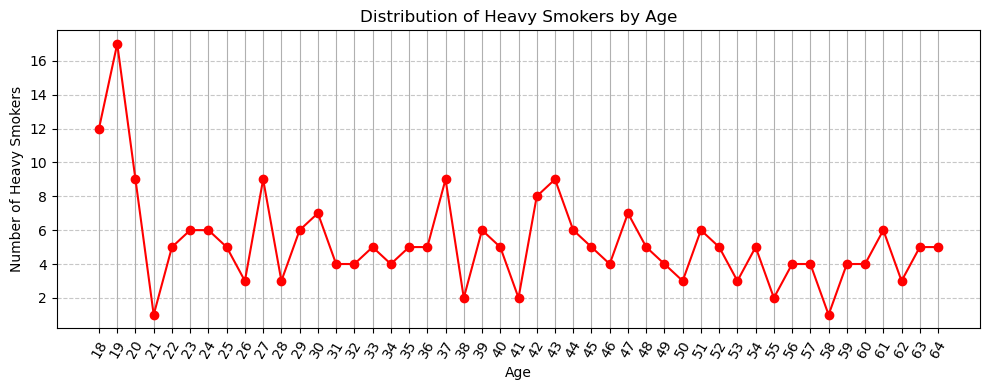

In [202]:
heavy_smokers = insurance[insurance['smoker'] == True]
heavy_smoker_counts = heavy_smokers['age'].value_counts().sort_index()
plt.figure(figsize=(10, 4))
plt.plot(heavy_smoker_counts.index, heavy_smoker_counts.values, marker='o', color='red')
plt.title('Distribution of Heavy Smokers by Age')
plt.xlabel('Age')
plt.ylabel('Number of Heavy Smokers')
plt.xticks(heavy_smoker_counts.index,rotation = 60)  
plt.grid()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() 
plt.show()

### question 3: Distribute that which region people are heavy smoker 

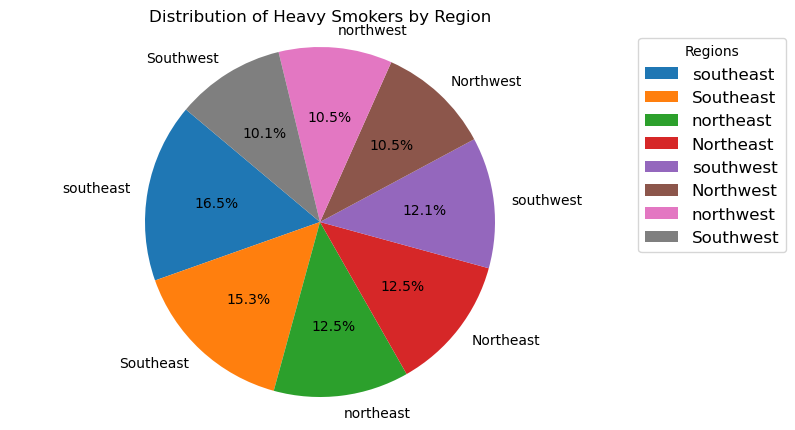

In [126]:
heavy_smokers = insurance[insurance['smoker'] == True]
region_counts = heavy_smokers['region'].value_counts()
plt.figure(figsize=(8, 5))
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=140)
plt.legend( region_counts.index, title="Regions",  bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)
plt.title("Distribution of Heavy Smokers by Region")
plt.axis('equal')  
plt.show()

### question 4: check which sex are heavy smokers

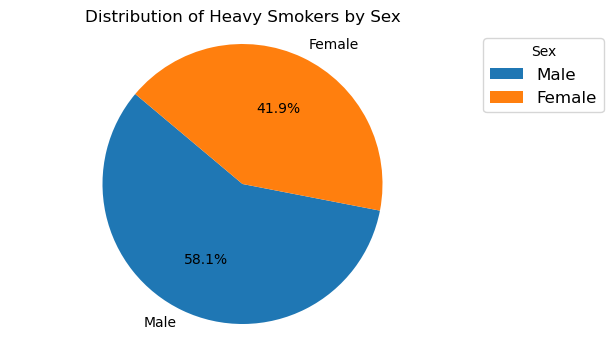

In [166]:
eavy_smokers = insurance[insurance['smoker'] == True]
heavy_smoker_counts = heavy_smokers['sex'].value_counts()
plt.figure(figsize=(6, 4))
plt.pie(heavy_smoker_counts, labels=heavy_smoker_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Heavy Smokers by Sex')
plt.legend( heavy_smoker_counts.index, title="Sex",  bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)
plt.axis('equal')  
plt.show()

### question 5: To count how many people fall within the BMI range of 18.5 to 24.9 and categorize them by sex

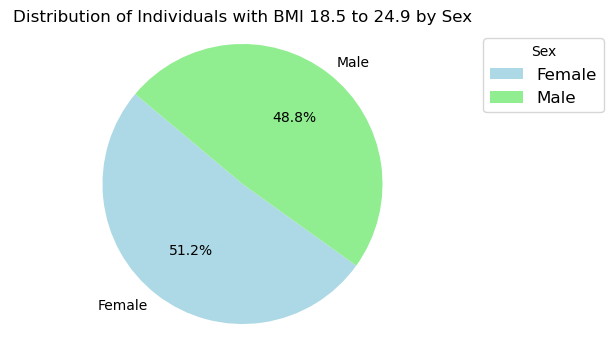

In [176]:
filtered_bmi = insurance[(insurance['bmi'] >= 18.5) & (insurance['bmi'] <= 24.9)]
bmi_count_by_sex = filtered_bmi['sex'].value_counts()
plt.figure(figsize=(6, 4))
plt.pie(bmi_count_by_sex, labels=bmi_count_by_sex.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen'])
plt.title('Distribution of Individuals with BMI 18.5 to 24.9 by Sex')
plt.legend( bmi_count_by_sex.index, title="Sex",  bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)
plt.axis('equal')  
plt.show()